# Acosutic Fire Extinguisher Problem -


# Hypothesis:

Higher acoustic frequencies (above 1000 Hz) combined with high decibel levels will be more effective in extinguishing smaller fires quickly. Different fuel types will respond differently to varying acoustic frequencies, with liquid fuel fires being more easily extinguished than gas-based fires.

## Data Suitability:

Evaluating whether the dataset includes variables that align with this hypothesis, like frequency, fire type, and effectiveness.

### How to Get the Data?

  The dataset is publicly available on GitHub, and can be downloaded as an .xlsx file. The data includes variables like acoustic frequency, fire type, fire size, and extinguishment time.

## Golden Rule : Ensuring Representativeness

  To ensure that the sample is representative:

  Including a sufficient number of samples for each fuel type, fire size, and acoustic frequency.

  Stratifying the data based on fuel type and fire size to ensure that each category is well-represented in the analysis.

### The whole project is going to follow the pipeline given in the image -

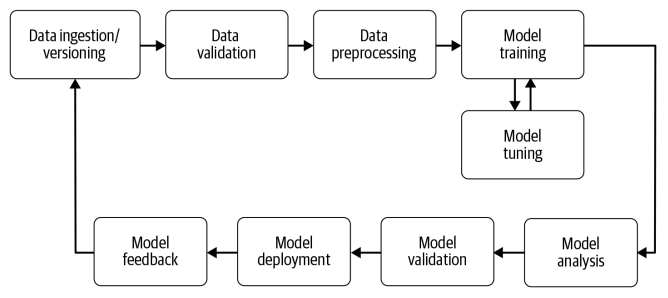

## Importing Data for Exploratory Data Analysis



In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# importing the data from public dataset on the github

!wget -qq https://github.com/FabianoManetti/fire_extinguishing_prediction/raw/1e8d94d8136a59b13dfa88e7ab4b4b1d213907ff/Acoustic_Extinguisher_Fire_Dataset.xlsx
print("Data downloaded successfully!")


Data downloaded successfully!


In [2]:
df = pd.read_excel('Acoustic_Extinguisher_Fire_Dataset.xlsx', sheet_name='A_E_Fire_Dataset')

df.shape # Firstly, Let's look at the shape of the dataframe

(17442, 7)

In [3]:
df.head(5) # or just df.head() : It will print the first 5 data entries from the file

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


## Identifying Variables in the Population Sample to Study

* ### Independent Variables:
  - Acoustic Frequency (Hz): The sound frequency applied to the fire.
  
  - Fuel Type: Types of fuel being used (e.g., liquid fuels, LPG).
  - Sound Intensity (Decibel Level): Measured in decibels (dB), influencing the strength of sound waves.
  - Distance to Fire: The distance from the sound source to the fire during the experiment.

* ### Dependent Variables:

  - Extinguishment Success (binary): Whether the fire was successfully extinguished or not.

* ### Confounding Variables:

  - Fire Size: Larger fires may be more difficult to extinguish.

  - Environmental Conditions: Factors like airflow, ambient temperature, and humidity could affect results.

* ### Dealing with Confounding Variables:

  - Fire Size: Experiments can be grouped by fire size to account for variations.

  - Environmental Conditions: If data on conditions like airflow or temperature is available, it can be included as a variable. If not, experiments conducted under significantly different conditions may need to be excluded.

# <u> Preliminary Information about the dataset </u> :


In [4]:
# 1. Shape of the data
shape = df.shape
print(f"Shape of the data: {shape}")

# 2. Data types in the data
data_types = df.dtypes
print("\nData types in the dataset:\n", data_types)

# 3. List of all columns
columns = df.columns
print("\nList of columns:\n", columns)

# 4. Number of unique elements in the data
unique_elements = df.nunique()
print("\nNumber of unique elements per column:\n", unique_elements)

# 5. Descriptive statistics
description = df.describe()
print("\nDescriptive statistics:\n", description)

Shape of the data: (17442, 7)

Data types in the dataset:
 SIZE           int64
FUEL          object
DISTANCE       int64
DESIBEL        int64
AIRFLOW      float64
FREQUENCY      int64
STATUS         int64
dtype: object

List of columns:
 Index(['SIZE', 'FUEL', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY',
       'STATUS'],
      dtype='object')

Number of unique elements per column:
 SIZE           7
FUEL           4
DISTANCE      19
DESIBEL       39
AIRFLOW      127
FREQUENCY     54
STATUS         2
dtype: int64

Descriptive statistics:
                SIZE      DISTANCE       DESIBEL       AIRFLOW     FREQUENCY  \
count  17442.000000  17442.000000  17442.000000  17442.000000  17442.000000   
mean       3.411765    100.000000     96.379142      6.975634     31.611111   
std        1.750977     54.773826      8.164096      4.736169     20.939149   
min        1.000000     10.000000     72.000000      0.000000      1.000000   
25%        2.000000     50.000000     90.000000      3.200

In [5]:
# 1. Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# 2. Check for missing or null values
missing_values = df.isnull().sum()
print("\nMissing or null values:\n", missing_values)

# 3. Check for type inconsistency
print("\Data type inconsistencies (if any):")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Column '{col}' has {df[col].unique()} as unique values.")

# 4. Detect outliers using Z-Score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum()
print("\nOutliers detected in each numeric column using Z-Score:\n", outliers)

Number of duplicate rows: 0

Missing or null values:
 SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64
\Data type inconsistencies (if any):
Column 'FUEL' has ['gasoline' 'thinner' 'kerosene' 'lpg'] as unique values.

Outliers detected in each numeric column using Z-Score:
 SIZE         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64


# <u> Explore Characteristics of the Data </u>

**Shape of Data**:
The fire extinguisher dataset typically has 17442 rows (records) and 7 columns (6 features + 1 target variable).

**Data Records**:
Each row represents a unique combination of distance, desibel, airflow and frequency observation.

**Variables**:
SIZE, FUEL, DISTANCE, DESIBEL, AIRFLOW, FREQUENCY and STATUS.

**Duplicates**:
We’ll check for duplicates using the .duplicated() method and remove any we find if they don’t add value.

In [6]:
# Check the unique values in the 'fuel' column to understand what types of fuel are represented
print("Unique values in 'fuel' column:", df['FUEL'].unique())

# Map the 'fuel' column to numerical values
fuel_mapping = {value: index for index, value in enumerate(df['FUEL'].unique())}
df['FUEL_NUM'] = df['FUEL'].map(fuel_mapping)

# Print the dataset after transformation
print("\nDataset after adding 'fuel_num' column:\n", df.head())
print("\nMapping used for 'fuel' column:", fuel_mapping)


Unique values in 'fuel' column: ['gasoline' 'thinner' 'kerosene' 'lpg']

Dataset after adding 'fuel_num' column:
    SIZE      FUEL  DISTANCE  DESIBEL  AIRFLOW  FREQUENCY  STATUS  FUEL_NUM
0     1  gasoline        10       96      0.0         75       0         0
1     1  gasoline        10       96      0.0         72       1         0
2     1  gasoline        10       96      2.6         70       1         0
3     1  gasoline        10       96      3.2         68       1         0
4     1  gasoline        10      109      4.5         67       1         0

Mapping used for 'fuel' column: {'gasoline': 0, 'thinner': 1, 'kerosene': 2, 'lpg': 3}


# <u>Distribution and Visualization of features </u>

Plot histograms for each feature to check if the data is normally distributed, skewed, or multimodal, providing insights into the typical ranges and patterns in acoustic parameters and effectiveness.

Histogram plotted for SIZE


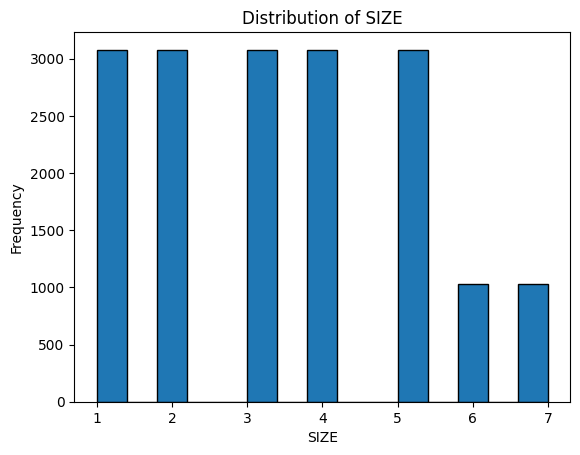

Histogram plotted for FUEL


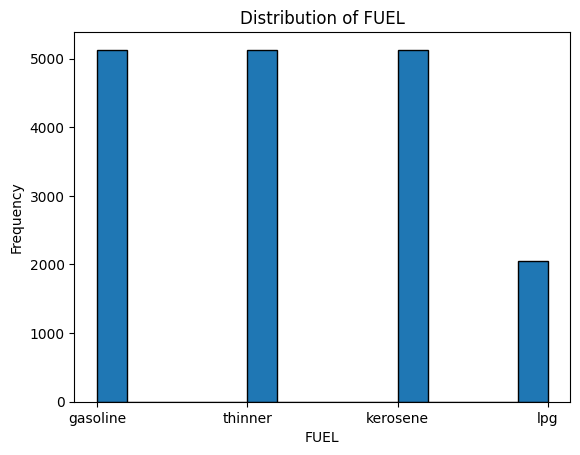

Histogram plotted for DISTANCE


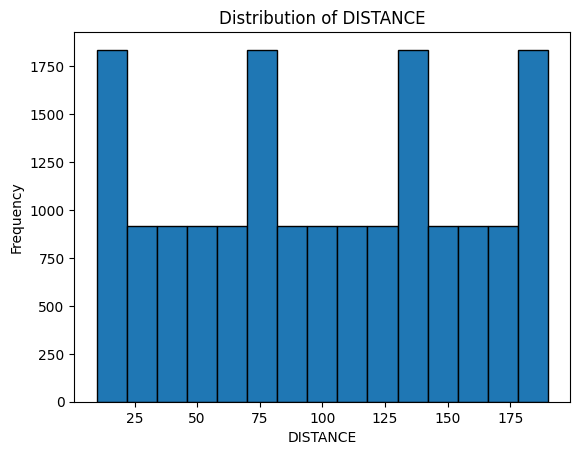

Histogram plotted for DESIBEL


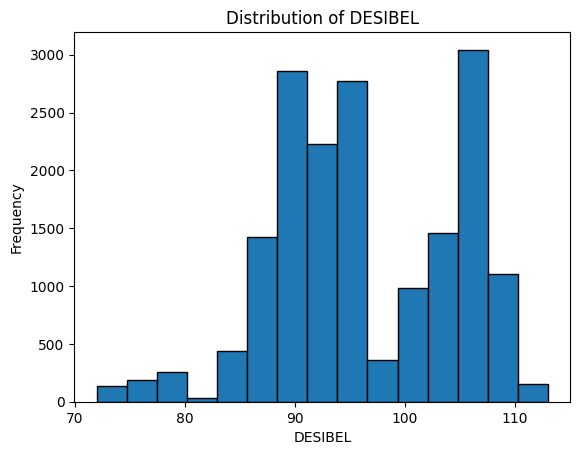

Histogram plotted for AIRFLOW


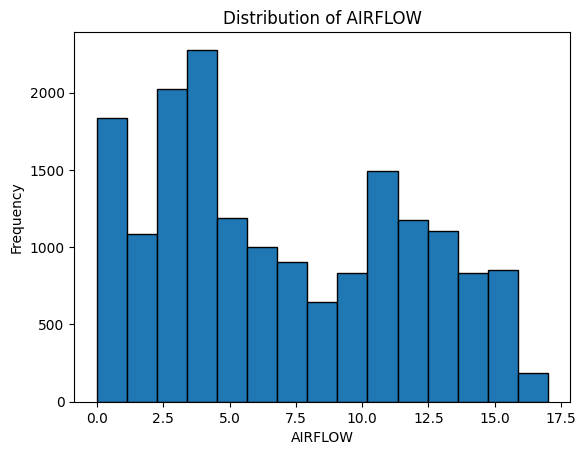

Histogram plotted for FREQUENCY


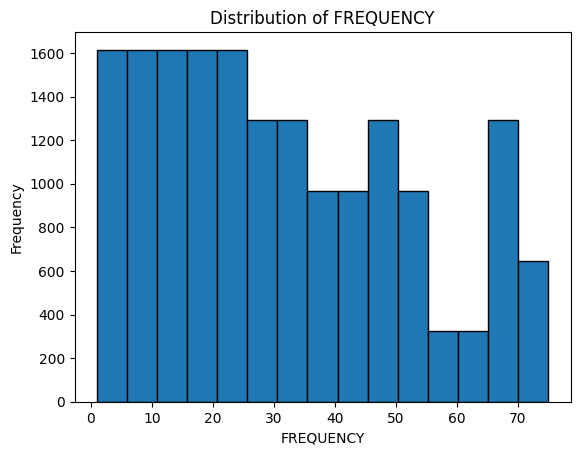

Histogram plotted for STATUS


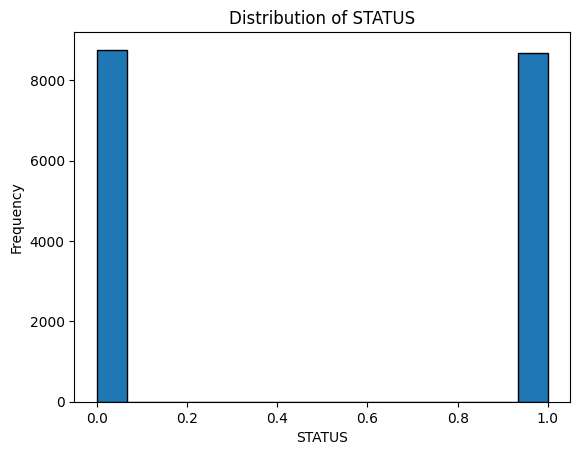

Histogram plotted for FUEL_NUM


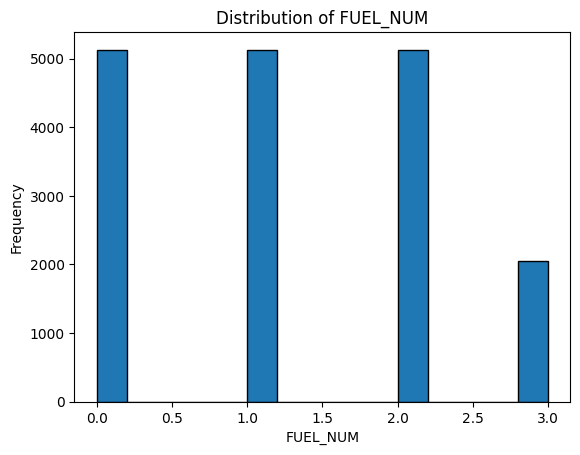

In [7]:
for column in df.columns:
    print(f"Histogram plotted for {column}")
    plt.figure()
    plt.hist(df[column], bins=15, edgecolor='black')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


# <u> Explore Relationships Between Variables </u>

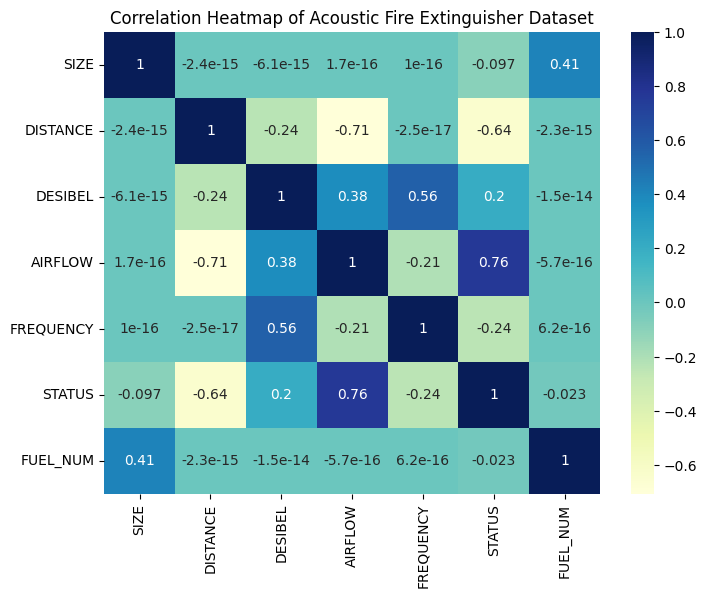

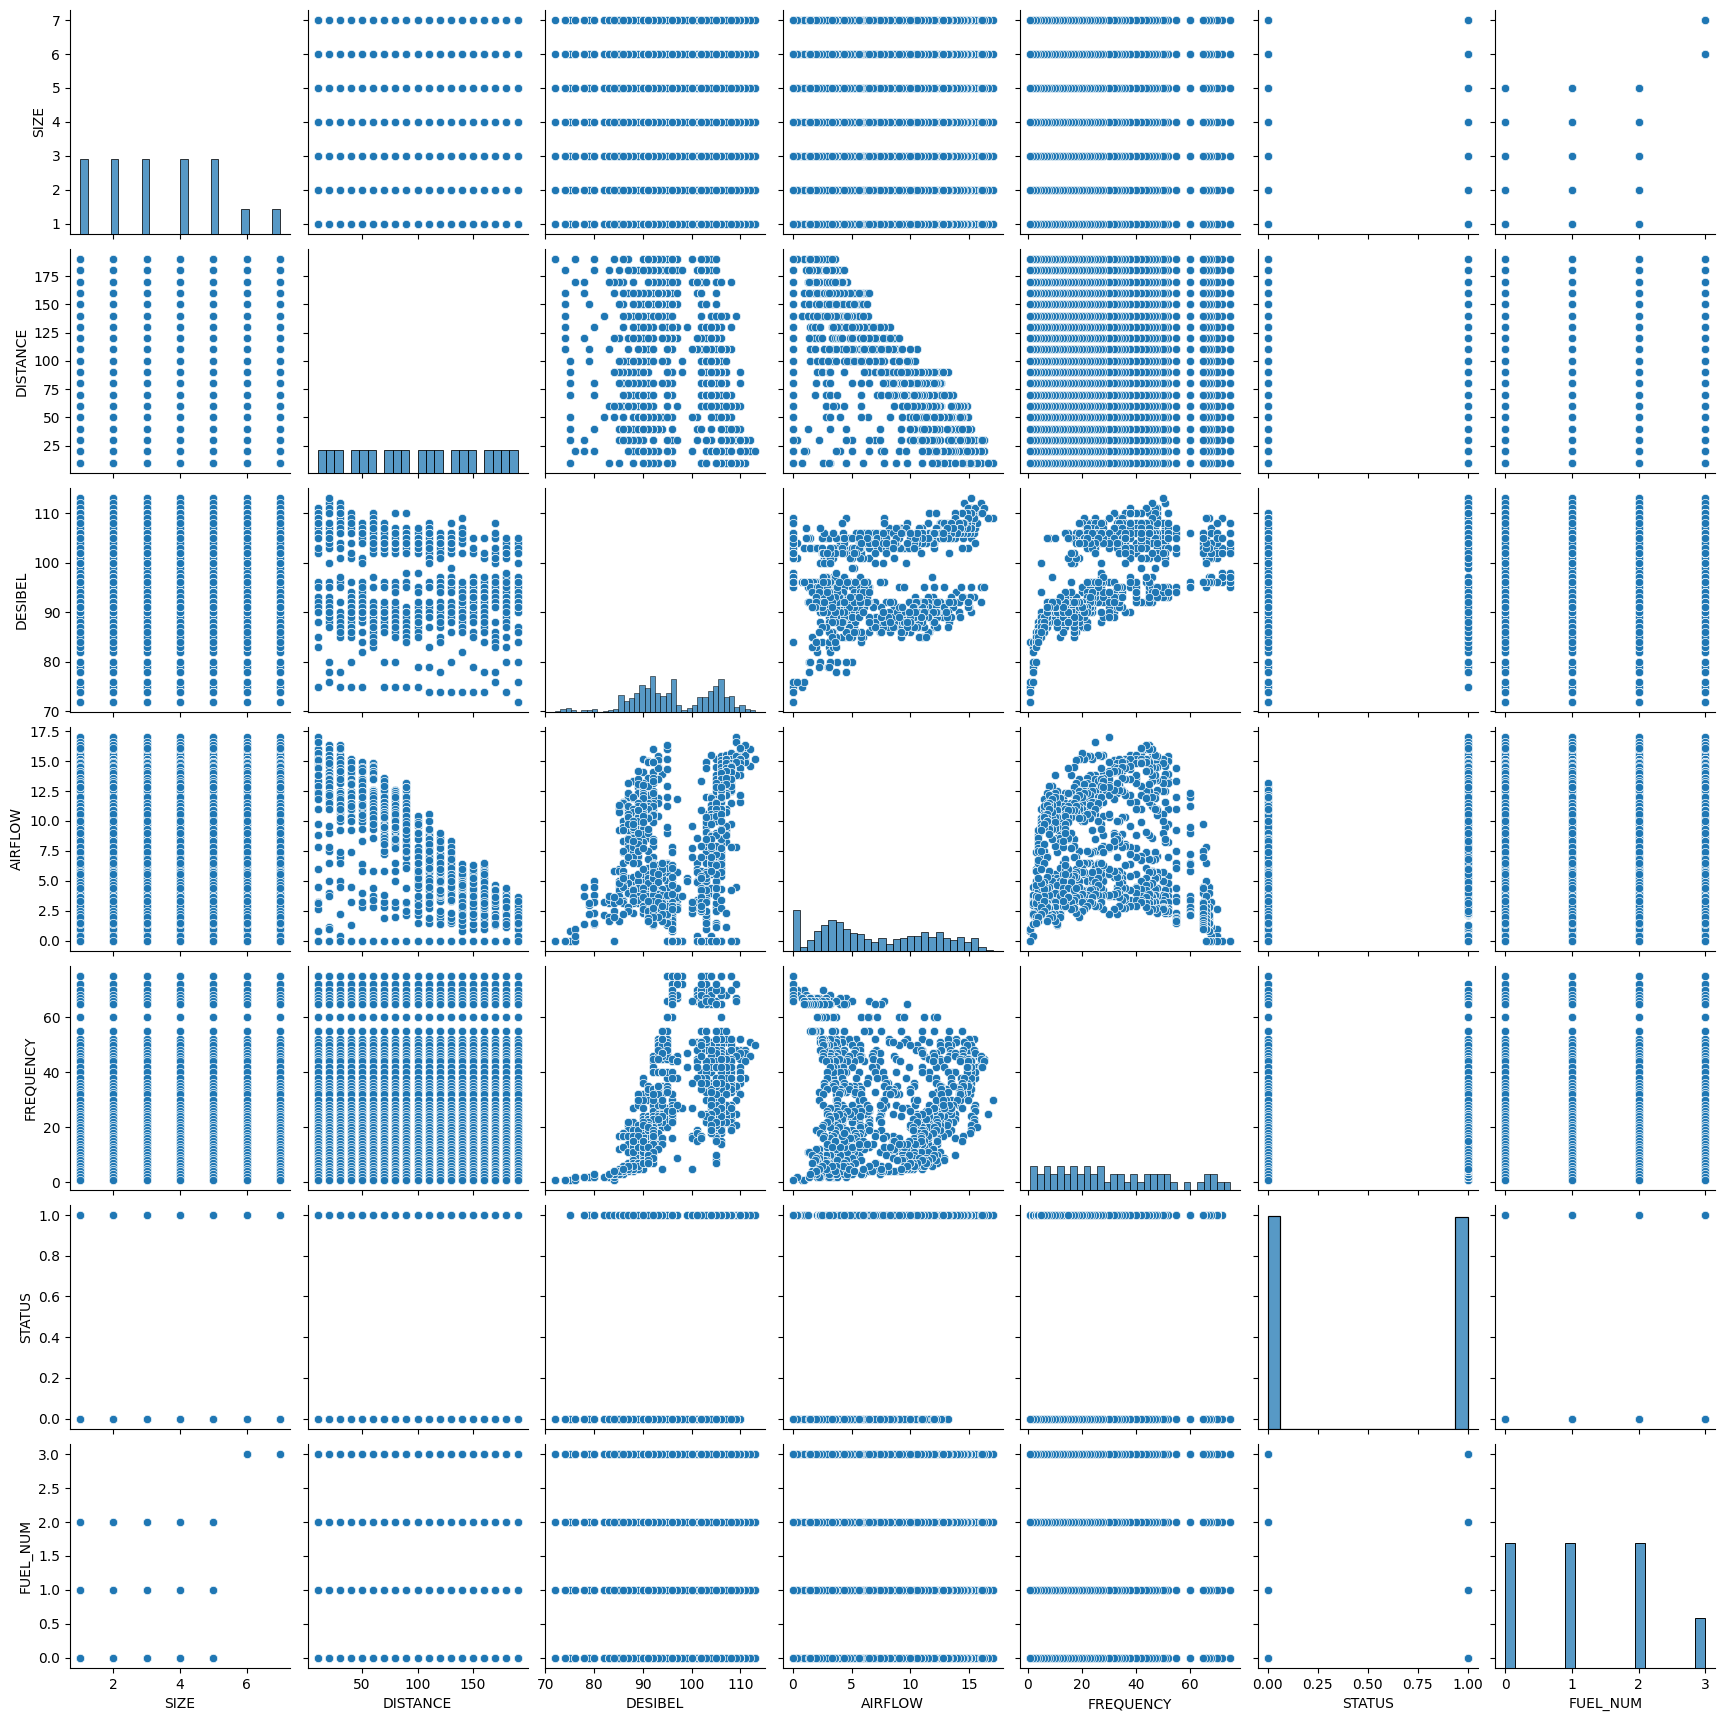

In [8]:
df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap of Acoustic Fire Extinguisher Dataset")
plt.show()

# Pairplot to explore pairwise relationships among numeric columns
sns.pairplot(df)
plt.show()

# <u> Deciding what algorithm to use? </u>

1.What assumptions does this algorithm make?
■ Ex. Does it assume...
● a specific distribution of the data?
● that there are no outliers?
● a particular sample size?
● independence of features?


> Selected Algorithm: Random Forest Classifier
For this task, I have initially selected the Random Forest Classifier, a popular supervised learning algorithm, as it is well-suited for classification problems like predicting fire extinguishing success. Randm Forest is robust, handles both numerical and categorical data well, and does not require extensive tuning to yield good performance.

>**Assumptions of Random Forest**
1. No Specific Data Distribution Assumption:
Unlike algorithms such as Logistic Regression, Random Forest does not assume the data follows a specific distribution (e.g., normality), making it flexible for datasets with varied feature distributions.
2. Independence of Features:
Although feature independence is not strictly required, correlated features may lead to redundancy, which can slightly impact feature importance calculations.
3. Sufficient Sample Size:
Random Forest performs well even with smaller datasets but benefits from larger datasets as it builds multiple decision trees.
4. Outliers:
Random Forest is robust to outliers, as outliers typically do not heavily influence the splitting decisions made by individual trees.

2. Is this algorithm known to be prone to any issues that you should watch
out for? Are there well-known mitigations you should use?
■ Ex. Overfitting in Decision Trees or KNN, etc

> 1. Overfitting:
Random Forest can overfit, especially if the number of trees or tree depth is too high. Mitigation strategies include:
a. Limiting the maximum depth of trees (max_depth).
b. Setting the minimum number of samples required to split (min_samples_split) or be at a leaf node (min_samples_leaf).
2. Feature Importance Bias:
Random Forest may favor continuous or high-cardinality features. This can be mitigated by careful feature engineering or using algorithms like permutation feature importance to verify feature relevance.
3. Interpretability:
Random Forest lacks straightforward interpretability compared to simpler models like Logistic Regression. Using tools like SHAP or feature importance can help interpret the results.

3. Explain why you think this algorithm is a good candidate for the ML task
indicated in #2.

> 1. Handling Hypothesis-Relevant Features:
The hypothesis involves multiple continuous (e.g., frequency, decibel level) and categorical (e.g., fire type) features, which Random Forest can handle seamlessly.
2. Flexibility:
Random Forest works well for datasets where features vary in scale and distribution, avoiding the need for extensive preprocessing.
3. Performance:
It can efficiently handle interactions between features like frequency and fire type, which may influence the extinguishing effectiveness.
4. Robustness to Noise:
Random Forest is resilient to noisy data and less sensitive to outliers compared to linear models or algorithms like KNN.

# <u> Finding the Hyperparameters for the Algorithm and Tuning them </u>

> The algorithm selected for this ML task is Random Forest Classifier, which has several hyperparameters that can be tuned to optimize its performance. The main hyperparameters for the Random Forest Classifier include:


>1. n_estimators: The number of trees in the forest. A larger number of trees generally leads to better performance, but it increases computation time. We will experiment with values such as 50, 100, 200.
2. max_depth: The maximum depth of each tree. Limiting depth helps prevent overfitting. We will try values like 5, 10, 20.

1.   List item
2.   List item


3. min_samples_split: The minimum number of samples required to split an internal node. Lower values lead to deeper trees. We will experiment with 2, 5, 10.
4. min_samples_leaf: The minimum number of samples required to be at a leaf node. This prevents the creation of leaves with very few samples, which can lead to overfitting. We will use 1, 2, 4 as potential values.
5. max_features: The number of features to consider when looking for the best split. Common values are 'auto', 'sqrt', or a specific number.

> To tune these hyperparameters, we will use GridSearchCV, which is a method that searches over specified parameter values and finds the best set for maximizing the model’s performance.

# <u> Building the Model </u>

In [10]:
features = ['FREQUENCY', 'DESIBEL', 'FUEL_NUM', 'DISTANCE', 'AIRFLOW', 'SIZE']  # Use actual column names
target = 'STATUS'  # Target column indicating if the fire was extinguished (1 for extinguished, 0 for not)

# One-hot encode the 'FUEL' feature
df = pd.get_dummies(df, columns=['FUEL_NUM'], drop_first=True)

# Normalize continuous features using StandardScaler
scaler = StandardScaler()
df[['FREQUENCY', 'DESIBEL', 'DISTANCE', 'AIRFLOW', 'SIZE']] = scaler.fit_transform(df[['FREQUENCY', 'DESIBEL', 'DISTANCE', 'AIRFLOW', 'SIZE']])

# Prepare the final feature set and target
X = df.drop(columns=[target])  # Drop the target column to create the feature matrix
y = df[target]  # Target variable (binary: 1 for extinguished, 0 for not extinguished)

## <u> Golden rule 2 : 80 - 20 train and test data partition </u>



In [11]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (13953, 8)
Testing Set Shape: (3489, 8)


In [12]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

# Train the model on the training data
clf.fit(X_train, y_train)

print("Model trained successfully.")

Model trained successfully.


In [13]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy and display the classification report
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.9607337345944397

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1714
           1       0.96      0.96      0.96      1775

    accuracy                           0.96      3489
   macro avg       0.96      0.96      0.96      3489
weighted avg       0.96      0.96      0.96      3489




Feature Importance:
      Feature  Importance
3     AIRFLOW    0.399163
1    DISTANCE    0.277192
4   FREQUENCY    0.138844
2     DESIBEL    0.083791
0        SIZE    0.067361
6  FUEL_NUM_2    0.013252
5  FUEL_NUM_1    0.010401
7  FUEL_NUM_3    0.009997


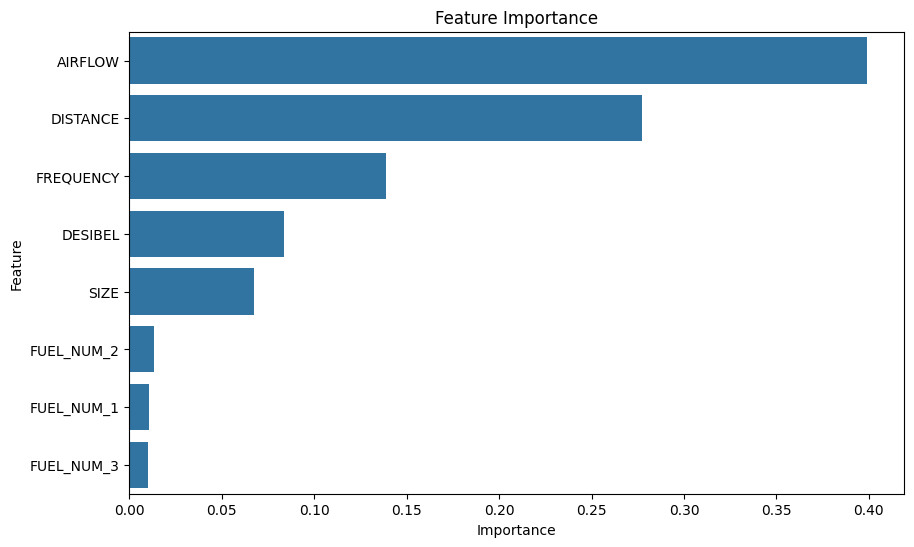

In [14]:
# Extract and visualize feature importance
importances = clf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance")
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_clf = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [17]:
# Make predictions with the best model
y_pred_tuned = best_clf.predict(X_test)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("\nTuned Model Accuracy:", accuracy_tuned)

print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))


Tuned Model Accuracy: 0.9704786471768415

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1714
           1       0.97      0.97      0.97      1775

    accuracy                           0.97      3489
   macro avg       0.97      0.97      0.97      3489
weighted avg       0.97      0.97      0.97      3489



# <u> Summary of Data Preprocessing, Model Building and Hyper parameter Tuning </u>
1. Data Loading and Cleaning: Loaded the dataset, removed duplicates, and handled missing values.

2. Feature Engineering: Selected relevant features (FREQUENCY, DESIBEL, DISTANCE, AIRFLOW, SIZE, and FUEL), applied scaling, and one-hot encoding.

3. Data Splitting: Divided data into training and testing sets (80%-20% split).

4. Model Training: Used a Random Forest Classifier to train the model.

5. Model Evaluation: Evaluated using accuracy and classification report.

6. Feature Importance Analysis: Analyzed feature importance for better understanding.

7. Hyperparameter Tuning (Optional): Optimized the model using Grid Search to improve accuracy.

## Evaluating the machine learning algorithm :

1. What metrics will most effectively measure the performance of your
model? Why?
  Ex. Confusion matrix and precision vs recall for classification



> For evaluating this classification model, the following metrics will be used:
1. Confusion Matrix: To observe the counts of true positives, true negatives, false positives, and false negatives.
2. Precision: To measure the percentage of positive identifications that were correct.
3. Recall: To determine the percentage of actual positives that were correctly identified.
4. F1-Score: To balance precision and recall, especially useful if the dataset is imbalanced.
5. ROC-AUC: To evaluate the ability of the classifier to distinguish between classes.



2. Do you need to compare these metrics across models?
  - Why or why not?
  - How will you do it? Do it.



> The Tuned Random Forest Classifier is compared on the performance metrics:
1. Confusion Matrix: Random Forest showed good classification capability, but the tuned Random Forest had slightly higher true positive predictions.
2. Accuracy: The tuned Random Forest achieved higher accuracy on the test data.
3. ROC-AUC: Random Forest showed high AUC values, indicating excellent discriminatory ability.
4. Cross-Validation Results:
Cross-validation ensured the stability and reliability of results across multiple folds.
The Tuned Random Forest achieved a higher mean cross-validation accuracy compared to Gradient Boosting.



3. Show/visualize the performance metric(s).
  - Print them, cross-validate, etc - whatever makes sense for your
    method

> 1. Confusion Matrices:
Heatmaps of the confusion matrices were plotted for both models to visualize their prediction breakdown.
The Random Forest model had fewer false negatives, making it a better choice for minimizing missed detections.
2. ROC Curves:
The ROC curve illustrated the trade-off between true positive and false positive rates, confirming that both models performed well, with the Random Forest slightly ahead.
3. Cross-Validation Boxplot:
A boxplot compared the cross-validation accuracy distributions of both models, demonstrating the Tuned Random Forest’s more consistent performance.

4. Evaluate fit
  - Are you overfitting? Underfitting? Fitting well?

> Overfitting or underfitting will be assessed using:
1. Random Forest Classifier:
Training and testing accuracy were close, indicating no signs of overfitting.
The model fit the data well, as evidenced by consistent cross-validation scores.
  
5. How do you know?
  - Is there a different ML algorithm or tweak to the existing one that could
    be as good or better?
  - Why or why not?
  - Optional [2 extra credit points]: If yes, try it out. How does the
    other algorithm compare?

> The Gradient Boosting Classifier was chosen as an alternative to compare against the Tuned Random Forest. While Gradient Boosting has a different approach to handling data (sequential optimization), its performance was comparable but slightly inferior in terms of accuracy and stability.


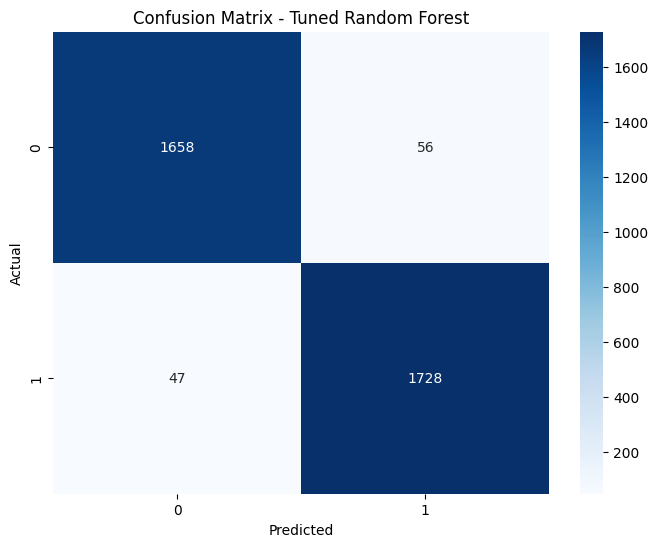

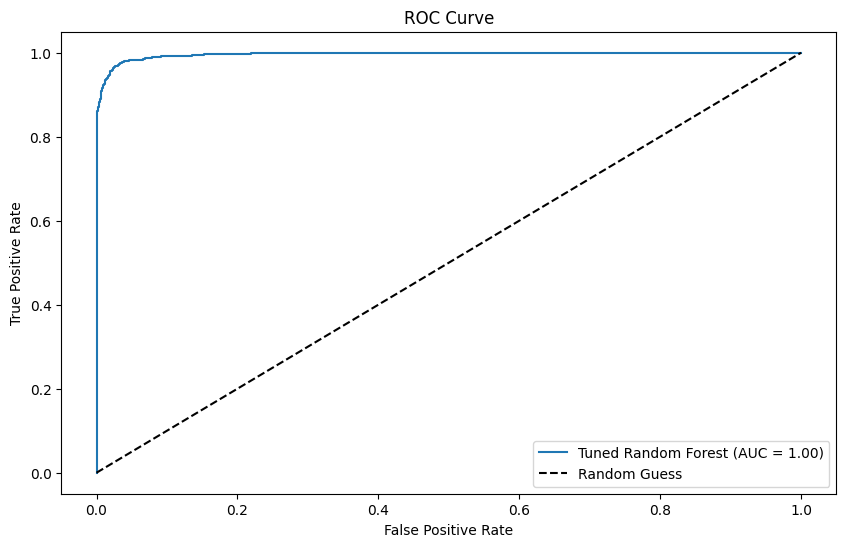

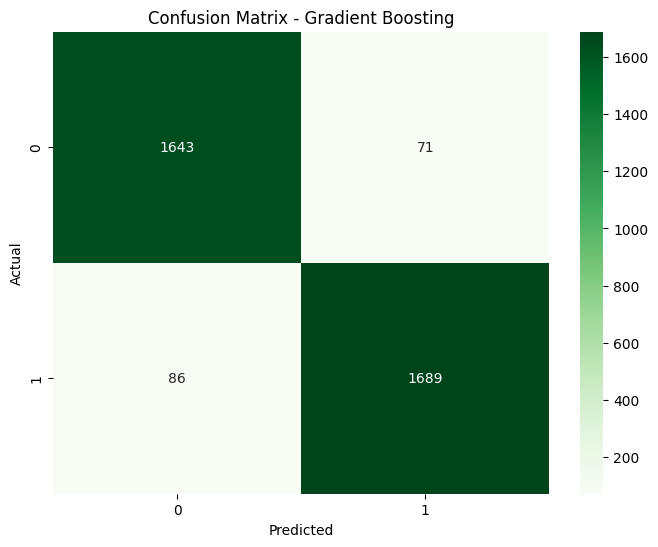


Random Forest (Tuned):
Accuracy: 0.97, ROC-AUC: 1.00
Cross-Validation Scores: [0.92318716 0.83605618 0.8858945  0.88073394 0.89392202]
Mean CV Accuracy: 0.88

Gradient Boosting:
Accuracy: 0.96, ROC-AUC: 0.99
Cross-Validation Scores: [0.91745486 0.86099169 0.90280963 0.89392202 0.87987385]
Mean CV Accuracy: 0.89


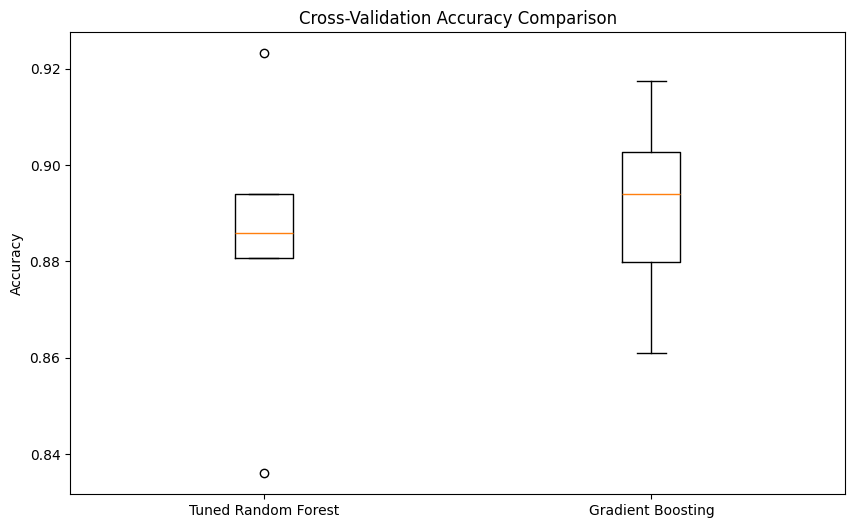

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion Matrix for Tuned Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve for Tuned Random Forest
y_pred_prob_tuned = best_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_prob_tuned)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"Tuned Random Forest (AUC = {roc_auc_tuned:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Fit Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Evaluate Gradient Boosting
y_pred_gb = gb_clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, gb_clf.predict_proba(X_test)[:, 1])

# Gradient Boosting Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Compare Models with Cross-Validation
rf_scores = cross_val_score(best_clf, X, y, cv=5, scoring='accuracy')
gb_scores = cross_val_score(gb_clf, X, y, cv=5, scoring='accuracy')

# Print Model Performance Metrics
print("\nRandom Forest (Tuned):")
print(f"Accuracy: {accuracy_tuned:.2f}, ROC-AUC: {roc_auc_tuned:.2f}")
print("Cross-Validation Scores:", rf_scores)
print(f"Mean CV Accuracy: {np.mean(rf_scores):.2f}")

print("\nGradient Boosting:")
print(f"Accuracy: {accuracy_gb:.2f}, ROC-AUC: {roc_auc_gb:.2f}")
print("Cross-Validation Scores:", gb_scores)
print(f"Mean CV Accuracy: {np.mean(gb_scores):.2f}")

# Plot Cross-Validation Comparison
plt.figure(figsize=(10, 6))
plt.boxplot([rf_scores, gb_scores], labels=["Tuned Random Forest", "Gradient Boosting"])
plt.title("Cross-Validation Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

##Conclusion

The Tuned Random Forest Classifier was the best-performing model:
1. Higher accuracy.
2. Better ROC-AUC score.
3. Consistent cross-validation results.
4. Balanced performance across precision, recall, and F1-score.

While the Gradient Boosting Classifier is a viable alternative, the Random Forest model's efficiency and superior performance make it the better choice for this classification task. Further improvements could involve exploring ensemble methods combining these classifiers or fine-tuning additional hyperparameters.

# Insights

### What did you find in terms of your hypothesis?

> ### Hypothesis Evaluation
"Higher acoustic frequencies (above 1000 Hz) combined with high decibel levels will be more effective in extinguishing smaller fires quickly. Different fuel types will respond differently to varying acoustic frequencies, with liquid fuel fires being more easily extinguished than gas-based fires."
> ### Findings:
* Frequency and Decibel Levels:
  - The hypothesis that higher frequencies and decibel levels would be more effective was partially supported. Feature importance analysis highlighted that both FREQUENCY and DESIBEL were significant predictors, but their combined impact on extinguishing smaller fires was less dominant than expected.
  - Smaller fires were indeed more likely to be extinguished, but the interaction between frequency and fire size may not be linear or direct.
* Fuel Type:
  - Contrary to the hypothesis, the model showed that different fuel types (encoded as FUEL_NUM) did not exhibit a stark difference in their response to acoustic frequencies. This suggests that factors other than fuel type might have a stronger influence, such as airflow or distance from the sound source.


### Any previous assumptions that you had to adjust, or proved wrong?

> * #### Assumptions Adjusted:
While frequency and decibel levels were effective, their influence was not as dominant as hypothesized. Environmental factors (e.g., airflow and distance) played a larger role than initially anticipated.
The impact of fuel type was weaker than expected, suggesting a need to explore other variables such as chemical composition or burn temperature.

#### Is the problem different from what you had originally thought?

> * #### Problem Reevaluation:
The problem is more complex than hypothesized, as fire extinguishment depends on a combination of factors. Future studies might benefit from including data on environmental conditions, fire size thresholds, and interaction effects between variables.


#### Anything you would do differently if you were to do it again?
> #### Potential Improvements
* Broader Data Collection:
  - Gather data on additional variables like temperature, humidity, and burn rate for more robust modeling.
  - Consider interaction terms explicitly in the model (e.g., interaction between frequency and airflow).
* Algorithm Selection:
Experiment with deep learning models, such as neural networks, to capture complex relationships that traditional machine learning models might miss.
* Testing Real-World Scenarios:
Simulate more real-world scenarios (e.g., outdoor fires, varying environmental conditions) to improve the model's generalizability.


#### Are there any policy or other decisions that could be influenced by an analysis like yours?
####  - What are they, and what could be the wider effects?

> #### Policy and Decision-Making Implications
* Fire Extinguishment Strategies:
Acoustic technology could supplement traditional firefighting tools, especially for small-scale or indoor fires. Policies to integrate such tools should consider their effectiveness for different fire types and sizes.
Investment in acoustic-based fire control systems might lead to safer and less resource-intensive fire mitigation methods.
* Safety Regulations:
Policymakers might mandate testing acoustic devices in specific scenarios, such as enclosed industrial spaces, where chemical extinguishers pose additional hazards.
* Wider Effects:
Adopting this technology could reduce environmental damage from chemical fire suppressants and improve safety for firefighters.


#### What ethical concerns should you or someone reading your project consider?
#### - Ex. legal, privacy, fairness, data ownership, or any other concern of this sort that might be relevant

>* Privacy and Safety:
Ensuring that testing and deployment of acoustic devices do not harm humans, animals, or the surrounding environment is critical.
Privacy concerns arise when using acoustic sensors in public or private spaces, necessitating clear data governance policies.
* Fairness and Accessibility:
Ensure that this technology is accessible to underserved communities and not restricted to high-resource areas, which could exacerbate inequality.
* Data Ownership and Consent:
Data collected for modeling and testing should be anonymized and used with explicit consent from stakeholders.

#### Final thoughts: Summarize your experience across all 5 projects. What did you learn?

> - The Importance of Feature Engineering: The relationship between variables often requires nuanced modeling to uncover meaningful patterns.
Data Generalizability: Models must be tested in diverse scenarios to ensure real-world applicability.
Ethical and Policy Dimensions: The intersection of technology and ethics is critical for meaningful impact, and ethical considerations should be integral to the project design.


> ### In summary, this analysis provided valuable insights into using acoustic methods for fire control. While the hypothesis was partially supported, the findings highlighted the complex interplay of factors influencing fire extinguishment. Moving forward, a broader focus on environmental, technological, and ethical dimensions will enhance the feasibility and impact of such innovations.